<a href="https://colab.research.google.com/github/sidhunt/ML-implementations/blob/main/Assign_5_Scratch_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learning from Scratch Resnet on CIFAR10 by Siddhant Badola.

(50000, 32, 32, 3)


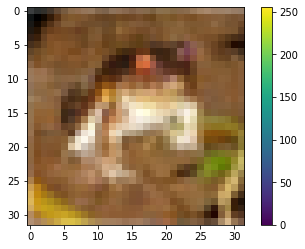

[6]
(50000, 1)
(50000, 10)


In [ ]:
import tensorflow as tf
from tensorflow import keras as k
from keras.utils import np_utils,to_categorical
import matplotlib.pyplot as plt
import os
import numpy as np
from keras.models import Model

from keras.preprocessing.image import ImageDataGenerator

(x_train,Y_train),(x_test,Y_test)= k.datasets.cifar10.load_data()

print(x_train.shape)

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

print(Y_train[0])

print(Y_train.shape)

datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    )
datagen.fit(x_train)

x_train = x_train.reshape(x_train.shape[0], 32,32,3)
x_test = x_test.reshape(x_test.shape[0], 32,32,3)

x_train=x_train.astype("float32")
x_test=x_test.astype("float32")

y_train=to_categorical(Y_train)
y_test=to_categorical(Y_test)
x_train/=255.0
x_test/=255.0

print(y_train.shape)










In [ ]:
mod=k.Sequential()
model1=k.applications.ResNet50V2(include_top=False,classes=10,pooling='max',weights=None,input_shape=(32,32,3))
mod.add(model1)
mod.add(k.layers.Dense(10, activation='sigmoid'))    

In [ ]:
schedule=k.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-1,decay_steps=100000,decay_rate=0.96,staircase=True,)  
sgd=k.optimizers.SGD(learning_rate=schedule)
mod.compile(optimizer=sgd,metrics=['accuracy'],loss=k.losses.CategoricalCrossentropy(from_logits=False,),) 

mod.summary()
print(len(mod.layers))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 2048)              23564800  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                20490     
Total params: 23,585,290
Trainable params: 23,539,850
Non-trainable params: 45,440
_________________________________________________________________
2


In [ ]:
history=mod.fit(datagen.flow(x_train,y_train,batch_size=128), epochs=90,steps_per_epoch=200,validation_data=(x_test,y_test),verbose=1,) 
loss,acc=mod.evaluate(x_test,y_test,verbose='1')
print("loss=",loss,"\nacc=",acc)

Epoch 1/90
200/200 [==============================] - 18s 90ms/step - loss: 1.9079 - accuracy: 0.2959 - val_loss: 1.8724 - val_accuracy: 0.3163
Epoch 2/90
200/200 [==============================] - 17s 87ms/step - loss: 1.5963 - accuracy: 0.4175 - val_loss: 1.5936 - val_accuracy: 0.4218
Epoch 3/90
200/200 [==============================] - 17s 87ms/step - loss: 1.4598 - accuracy: 0.4681 - val_loss: 1.4363 - val_accuracy: 0.4789
Epoch 4/90
200/200 [==============================] - 17s 87ms/step - loss: 1.3739 - accuracy: 0.5017 - val_loss: 1.7292 - val_accuracy: 0.4119
Epoch 5/90
200/200 [==============================] - 17s 87ms/step - loss: 1.3126 - accuracy: 0.5263 - val_loss: 1.4115 - val_accuracy: 0.5043
Epoch 6/90
200/200 [==============================] - 17s 87ms/step - loss: 1.2591 - accuracy: 0.5472 - val_loss: 1.3807 - val_accuracy: 0.5273
Epoch 7/90
200/200 [==============================] - 17s 87ms/step - loss: 1.2123 - accuracy: 0.5664 - val_loss: 1.4039 - val_accuracy:

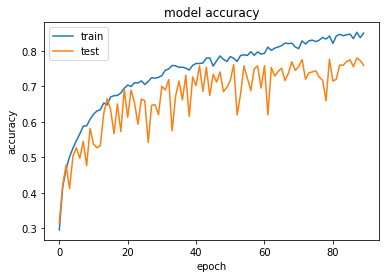

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
history=mod.fit(datagen.flow(x_train,y_train,batch_size=128), epochs=10,steps_per_epoch=200,validation_data=(x_test,y_test),verbose=1,)
loss,acc=mod.evaluate(x_test,y_test,verbose='1')
print("loss=",loss,"\nacc=",acc)

Epoch 1/10
200/200 [==============================] - 18s 88ms/step - loss: 0.4110 - accuracy: 0.8519 - val_loss: 0.9411 - val_accuracy: 0.7322
Epoch 2/10
200/200 [==============================] - 18s 88ms/step - loss: 0.4209 - accuracy: 0.8484 - val_loss: 0.7348 - val_accuracy: 0.7746
Epoch 3/10
200/200 [==============================] - 17s 87ms/step - loss: 0.3933 - accuracy: 0.8567 - val_loss: 0.7523 - val_accuracy: 0.7722
Epoch 4/10
200/200 [==============================] - 17s 87ms/step - loss: 0.4067 - accuracy: 0.8533 - val_loss: 0.7188 - val_accuracy: 0.7764
Epoch 5/10
200/200 [==============================] - 17s 87ms/step - loss: 0.4172 - accuracy: 0.8521 - val_loss: 0.8287 - val_accuracy: 0.7478
Epoch 6/10
200/200 [==============================] - 17s 87ms/step - loss: 0.4152 - accuracy: 0.8523 - val_loss: 0.7734 - val_accuracy: 0.7628
Epoch 7/10
200/200 [==============================] - 17s 87ms/step - loss: 0.4768 - accuracy: 0.8312 - val_loss: 0.8214 - val_accuracy: